## John David
## CS4342

## DBSCAN

In [116]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import pylab
import random
import pandas as pd
import seaborn as sns
from scipy import stats

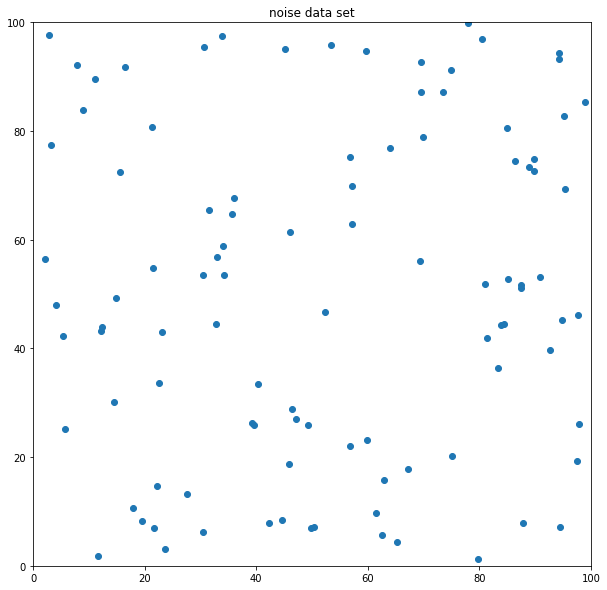

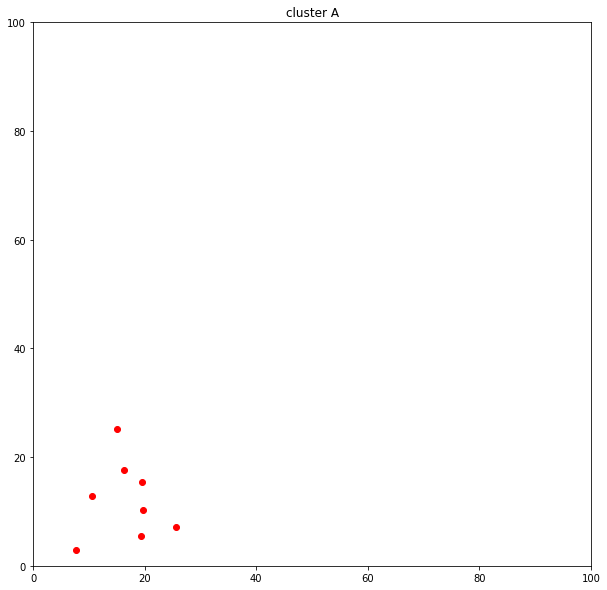

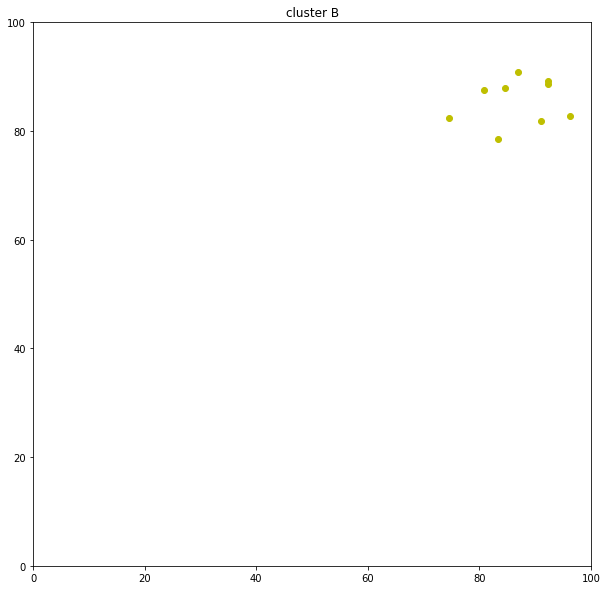

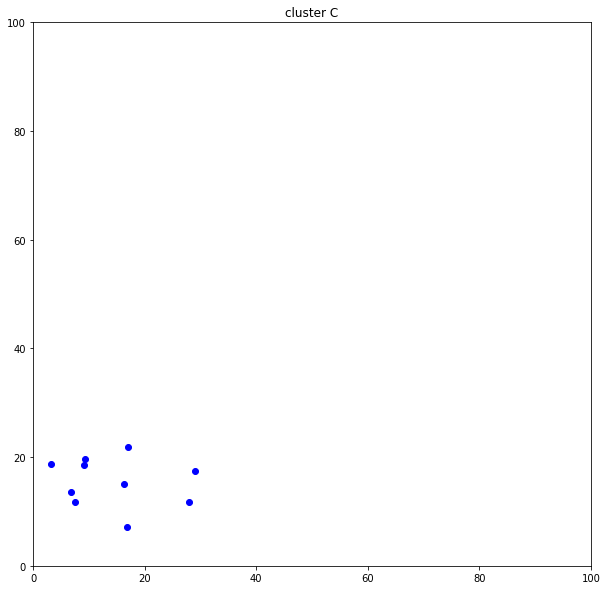

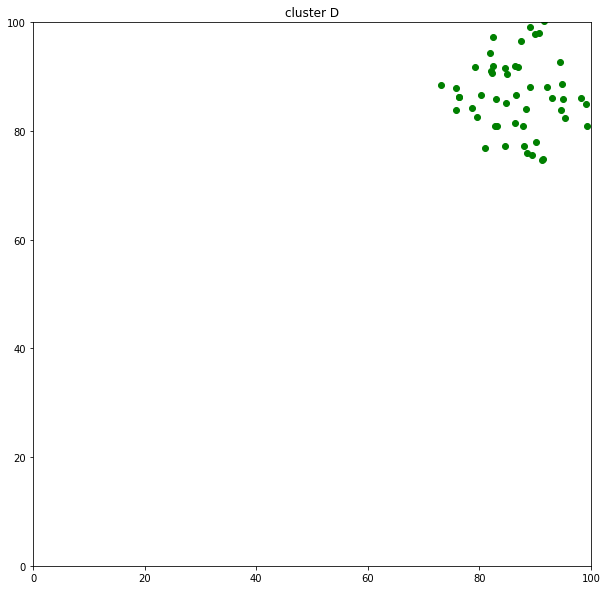

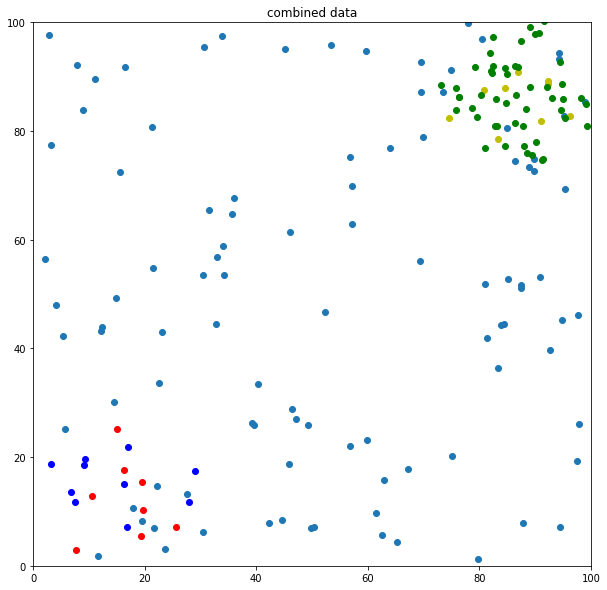

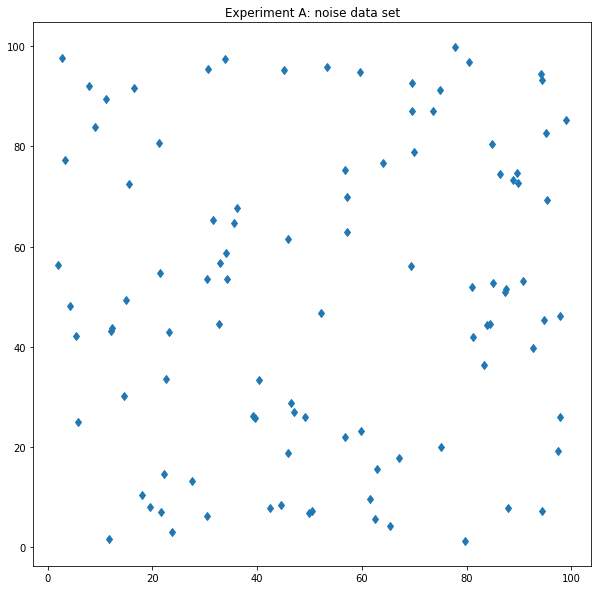

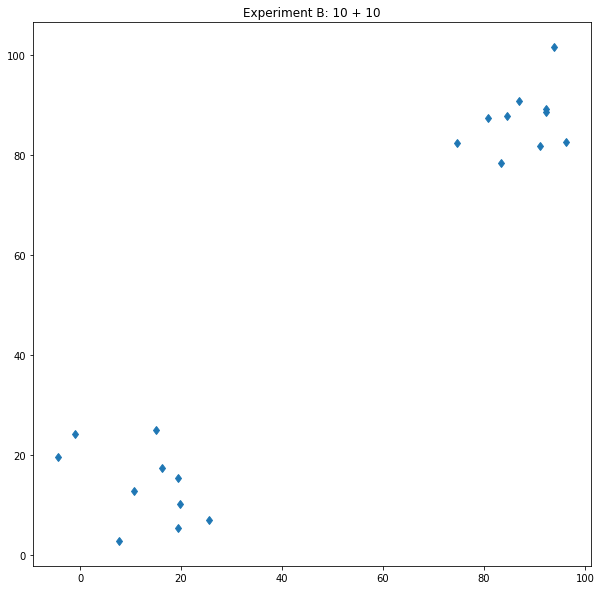

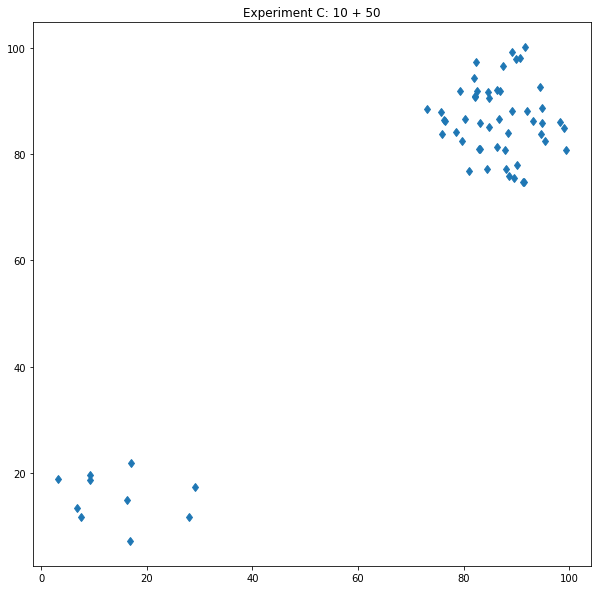

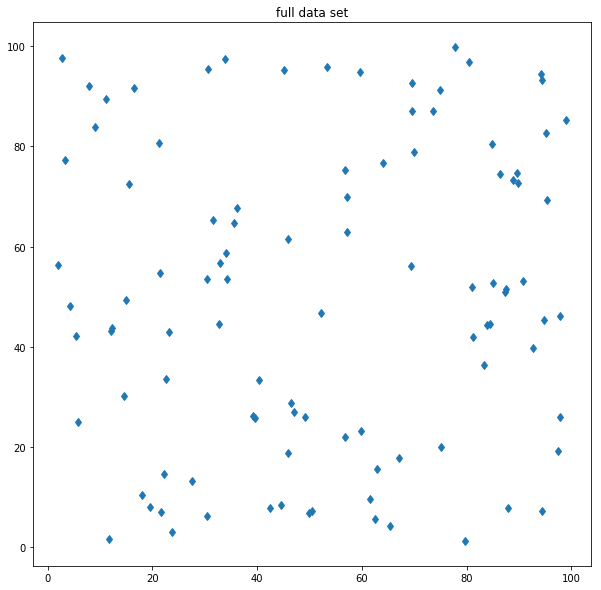

In [117]:
a_clust = 10;
b_clust = 10;
c_clust = 10;
d_clust = 50;

noise = 100;

# blur around centroid (std units)
std_dev = 7

N_set = [50, 50]

# XY centroid locations
A = [  15, 15 ]
B = [ 85, 85 ]
C = [  15, 15 ]
D = [  85, 85 ]


n = [ np.random.uniform(1, 100, 100) , np.random.uniform(1, 100, 100) ]

#print(n)

# generate data
# using a normal distribution to get a better cluster effect
a = [ A[0]+np.random.randn(a_clust)*std_dev , A[1]+np.random.randn(a_clust)*std_dev ]
b = [ B[0]+np.random.randn(b_clust)*std_dev , B[1]+np.random.randn(b_clust)*std_dev ]
c = [ C[0]+np.random.randn(c_clust)*std_dev , C[1]+np.random.randn(c_clust)*std_dev ]
d = [ D[0]+np.random.randn(d_clust)*std_dev , D[1]+np.random.randn(d_clust)*std_dev ]


# show noise data set
noise_data = np.transpose(n)
plt.figure(figsize=(10,10))
plt.plot(noise_data[:,0], noise_data[:,1], 'o')
plt.axis([0, 100, 0, 100])
plt.title('noise data set')
plt.show()

# show data cluster A
a_data = np.transpose(a)
plt.figure(figsize=(10,10))
plt.plot(a_data[:,0], a_data[:,1], 'ro')
plt.axis([0, 100, 0, 100])
plt.title('cluster A')
plt.show()


# show data cluster B
b_data = np.transpose(b)
plt.figure(figsize=(10,10))
plt.plot(b_data[:,0], b_data[:,1], 'yo')
plt.axis([0, 100, 0, 100])
plt.title('cluster B')
plt.show()

# show data cluster C
plt.figure(figsize=(10,10))
c_data = np.transpose(c)
plt.plot(c_data[:,0], c_data[:,1], 'bo')
plt.axis([0, 100, 0, 100])
plt.title('cluster C')
plt.show()

# show data cluster D
d_data = np.transpose(d)
plt.figure(figsize=(10,10))
plt.plot(d_data[:,0], d_data[:,1], 'go')
plt.axis([0, 100, 0, 100])
plt.title('cluster D')
plt.show()

# combined data
plt.figure(figsize=(10,10))
plt.plot(noise_data[:,0], noise_data[:,1],'o')
plt.plot(a_data[:,0], a_data[:,1], 'ro')
plt.plot(b_data[:,0], b_data[:,1], 'yo')
plt.plot(c_data[:,0], c_data[:,1], 'bo')
plt.plot(d_data[:,0], d_data[:,1], 'go')
plt.axis([0, 100, 0, 100])
plt.title('combined data')
plt.show()

#dataA = np.transpose( np.concatenate((n),axis=0) )
dataA = data = np.transpose(n)
plt.figure(figsize=(10, 10))
plt.plot(dataA[:,0], dataA[:,1], 'd')
plt.title('Experiment A: noise data set')
plt.show()

dataB = np.transpose( np.concatenate((a, b),axis=1) )
plt.figure(figsize=(10, 10))
plt.plot(dataB[:,0], dataB[:,1], 'd')
plt.title('Experiment B: 10 + 10')
plt.show()

dataC = np.transpose( np.concatenate((c, d),axis=1) )
plt.figure(figsize=(10, 10))
plt.plot(dataC[:,0], dataC[:,1], 'd')
plt.title('Experiment C: 10 + 50')
plt.show()

#how the algorithm will see the data
#concatanate all generated data into a list
dataset = np.transpose( np.concatenate((n, a, b, c, d),axis=1) )
plt.figure(figsize=(10, 10))
plt.plot(data[:,0], data[:,1], 'd')
plt.title('full data set')
plt.show()


### DBSCAN algorithm

In [118]:
#print(data)

In [119]:
def check(pt, eps, data):
    
    neighbor_pts = {}
    # enumerate the data and check against epsilon
    for index, point in enumerate(data):
        if np.sqrt(np.sum(np.square(pt - point[0, :2]))) < eps:
            neighbor_pts[index] = point

    return neighbor_pts


def dbscan(dataset, eps, min_pts):
    matrix = np.matrix(dataset)
    
    target = np.full((dataset.shape[0], 1), -1)
    
    data = np.concatenate((matrix, target), axis=1)
    
    c = 0
    
    for index, row in enumerate(data):
        
        if row[0, -1] == -1:
            neighbors = check(row[0, :2], eps, data)
            
            if len(neighbors.keys()) < min_pts:
                data[index, -1] = -2
            else:
                data[index, -1] = c
                while len(neighbors.keys()) > 0:
                    point_key = [k for k in neighbors.keys()][0]
                    point = neighbors.pop(point_key)
                    if point[0, -1] == -2:
                        data[point_key, -1] = c
                    if point[0, -1] == -1:
                        data[point_key, -1] = c
                        new_neighbors = check(point[0, :2], eps, data)
                        if len(new_neighbors):
                            neighbors.update(new_neighbors)
                c += 1

    #print(data)
    data1 = pd.DataFrame(data=data)  
    g = sns.FacetGrid(data1, hue=2, size=7)   
    g.map(plt.scatter, 0, 1, s=100).set_axis_labels("X", "Y").add_legend() 
    plt.show()
    
########

epsilon = 7
minimum_points = 10



### Running Experiment A

#### Runing Data Set A with Episilon = 10 and Minimum Points = 5

These values were chosen randomly.

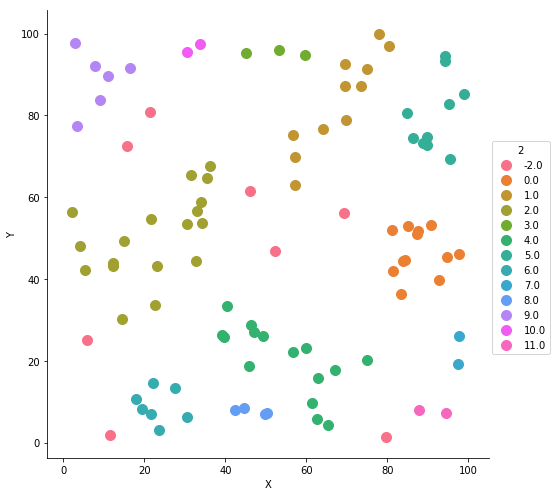

In [120]:
epsilon = 10
minimum_points = 2

dbscan(dataA, epsilon, minimum_points)

### Running Experiment B

#### Runing Data Set A with Episilon = 15 and Minimum Points = 10

These values were chosen because an epsilon of 15 best represented
the distance from the core point in each of the two clusters. Since
each cluster was composed of 10. This seemed to force the algorithm to 
choose 2 clusters with a high degree of accuracy.

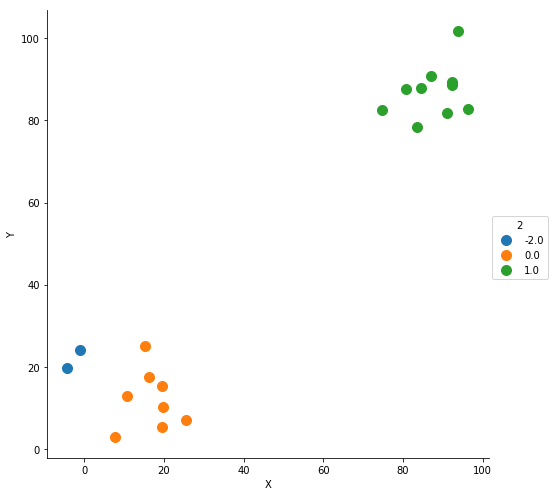

In [121]:
epsilon = 15
minimum_points = 5

dbscan(dataB, epsilon, minimum_points)

### Running Experiment C

#### Runing Data Set A with Episilon = 10 and Minimum Points = 10

These values were chosen because of the high degree of accuracy.

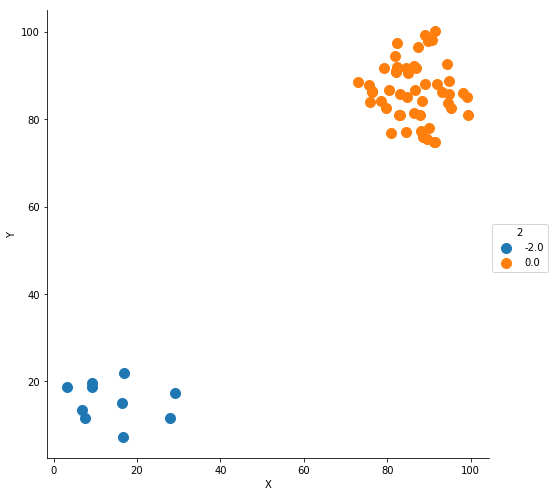

In [124]:
epsilon = 15
minimum_points = 30

dbscan(dataC, epsilon, minimum_points)

### combined data experiment

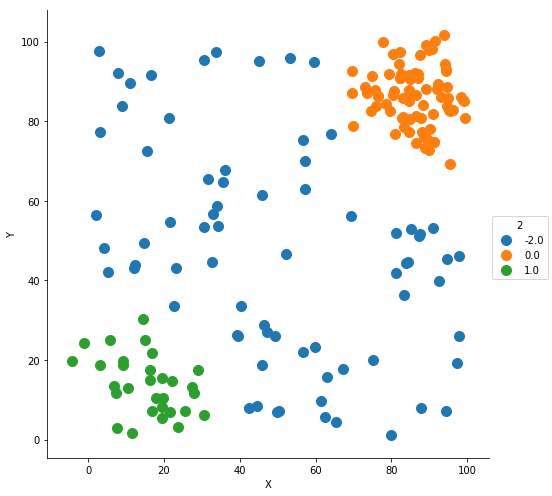

In [125]:
epsilon = 9
minimum_points = 10

dbscan(dataset, epsilon, minimum_points)